# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observable Trends
#1.  The further away a city is from the equator the colder it will get. The closer a city is to the equator the warmer it will be.
#2. Cities tend to have humidity percentages greater than 60%.
#3. There is no correlation between city latitude and cloudiness.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
city_response=[]

print("Beginning Data Retrieval")
print("---------------------------")

city_number=0
city_set=1

for city in cities:
    if city_number > 48:
        city_number=0
        city_set+=1
        time.sleep(60)
        
    else:
        city_number+=1
        print(f"Processing Record {city_number} of Set {city_set}|{city}")
        
     
        try: 
            url = "http://api.openweathermap.org/data/2.5/weather?"
            units = "metric"
            query_url = f"{url}appid={api_key}&units={units}&q="
            weather_response = requests.get(query_url + city).json()
            
            
            clouds=weather_response['clouds']['all']
            country=weather_response['sys']['country']   
            date= weather_response['dt']
            humidity= weather_response['main']['humidity']
            lat=weather_response['coord']['lat']  
            lng=weather_response['coord']['lon']          
            max_temp=weather_response['main']['temp_max']
            wind_speed=weather_response['wind']['speed']


            city_response.append({"City": city,
            "Cloudiness":clouds,
            "Country": country,     
            "Date": date,     
            "Humidity": humidity,     
            "Lat": lat,    
            "Lng": lng,          
            "Max Temp": max_temp,
            "Wind Speed": wind_speed})

        except (KeyError, IndexError):
            print("City not found. Skipping...")
        continue
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1|hermanus
Processing Record 2 of Set 1|fallon
Processing Record 3 of Set 1|palmer
Processing Record 4 of Set 1|mataura
Processing Record 5 of Set 1|okha
Processing Record 6 of Set 1|saint-louis
Processing Record 7 of Set 1|busselton
Processing Record 8 of Set 1|tasiilaq
Processing Record 9 of Set 1|georgetown
Processing Record 10 of Set 1|mar del plata
Processing Record 11 of Set 1|bredasdorp
Processing Record 12 of Set 1|bethel
Processing Record 13 of Set 1|turayf
Processing Record 14 of Set 1|ushuaia
Processing Record 15 of Set 1|nuuk
Processing Record 16 of Set 1|alofi
Processing Record 17 of Set 1|vallenar
Processing Record 18 of Set 1|norman wells
Processing Record 19 of Set 1|zhangjiakou
Processing Record 20 of Set 1|puerto ayora
Processing Record 21 of Set 1|khatanga
Processing Record 22 of Set 1|dongying
Processing Record 23 of Set 1|punta arenas
Processing Record 24 of Set 1|lakatoro
Processing Re

Processing Record 1 of Set 5|segezha
Processing Record 2 of Set 5|narsaq
Processing Record 3 of Set 5|pangnirtung
Processing Record 4 of Set 5|angoche
Processing Record 5 of Set 5|upernavik
Processing Record 6 of Set 5|carutapera
Processing Record 7 of Set 5|barentsburg
City not found. Skipping...
Processing Record 8 of Set 5|longyearbyen
Processing Record 9 of Set 5|karkaralinsk
City not found. Skipping...
Processing Record 10 of Set 5|nemuro
Processing Record 11 of Set 5|nikolskoye
Processing Record 12 of Set 5|mtsamboro
Processing Record 13 of Set 5|port lincoln
Processing Record 14 of Set 5|bengkulu
City not found. Skipping...
Processing Record 15 of Set 5|port hedland
Processing Record 16 of Set 5|yulara
Processing Record 17 of Set 5|saleaula
City not found. Skipping...
Processing Record 18 of Set 5|sevierville
Processing Record 19 of Set 5|matay
Processing Record 20 of Set 5|indiana
Processing Record 21 of Set 5|melekhovo
Processing Record 22 of Set 5|seoul
Processing Record 23 o

Processing Record 48 of Set 8|sitka
Processing Record 49 of Set 8|kinablangan
Processing Record 1 of Set 9|saint anthony
Processing Record 2 of Set 9|weihe
Processing Record 3 of Set 9|abapo
Processing Record 4 of Set 9|besancon
Processing Record 5 of Set 9|mehamn
Processing Record 6 of Set 9|atka
City not found. Skipping...
Processing Record 7 of Set 9|knyaginino
Processing Record 8 of Set 9|yerbogachen
Processing Record 9 of Set 9|kamakwie
Processing Record 10 of Set 9|batemans bay
Processing Record 11 of Set 9|kinkala
Processing Record 12 of Set 9|biryusinsk
Processing Record 13 of Set 9|amherst
Processing Record 14 of Set 9|faya
Processing Record 15 of Set 9|cervo
Processing Record 16 of Set 9|naze
Processing Record 17 of Set 9|middelburg
Processing Record 18 of Set 9|filadelfia
Processing Record 19 of Set 9|humaita
Processing Record 20 of Set 9|kamaishi
Processing Record 21 of Set 9|road town
Processing Record 22 of Set 9|almaznyy
Processing Record 23 of Set 9|rolla
Processing Rec

Processing Record 1 of Set 13|camacupa
Processing Record 2 of Set 13|kawana waters
City not found. Skipping...
Processing Record 3 of Set 13|rancho palos verdes
Processing Record 4 of Set 13|balaipungut
Processing Record 5 of Set 13|sarkand
Processing Record 6 of Set 13|vahan
Processing Record 7 of Set 13|talnakh
Processing Record 8 of Set 13|karauzyak
City not found. Skipping...
Processing Record 9 of Set 13|barcelos
Processing Record 10 of Set 13|malindi
Processing Record 11 of Set 13|namanyere
Processing Record 12 of Set 13|swan hill
Processing Record 13 of Set 13|huilong
Processing Record 14 of Set 13|fomboni
---------------------------
Data Retrieval Complete
---------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_pd=pd.DataFrame(city_response)

weather_pd.to_csv(output_data_file, encoding="utf-8", index=False)

weather_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,50,ZA,1575418759,51,-34.42,19.24,14.44,6.26
1,fallon,1,US,1575418759,60,46.84,-105.12,6.00,5.10
2,palmer,75,AU,1575418759,59,-34.85,139.16,18.89,4.10
3,mataura,52,NZ,1575418590,69,-46.19,168.86,15.56,8.05
4,okha,98,RU,1575418759,67,53.59,142.95,-2.28,9.65


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

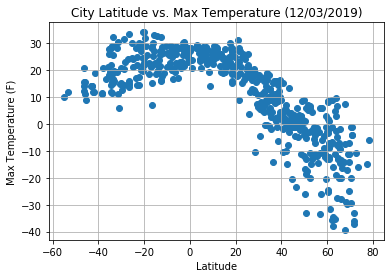

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_pd["Lat"], weather_pd["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (12/03/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTemperaturesInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

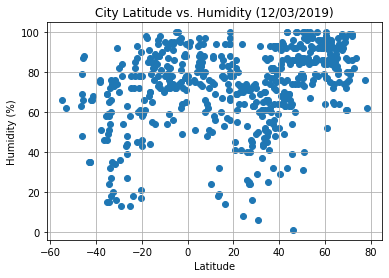

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_pd["Lat"], weather_pd["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (12/03/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

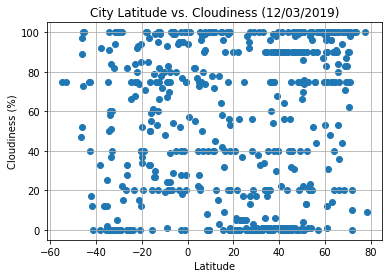

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_pd["Lat"], weather_pd["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (12/03/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

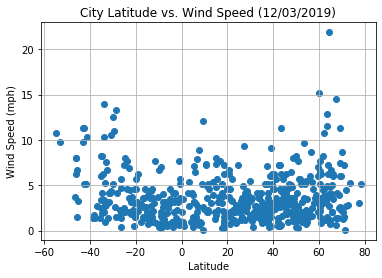

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_pd["Lat"], weather_pd["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (12/03/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()